<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/Algorithmic_Trading_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algorithmic Trading

In [0]:
!pip install quandl

In [0]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#importing data from quandl
import quandl
aapl = quandl.get('WIKI/AAPL', start_Date = '2016-10-01', end_date = '2012-01-01')

In [52]:
#inspecting the first 5 elements
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [7]:
#inspecting the last five elements
aapl.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2011-12-23,399.69,403.59,399.495,403.33,9621400.0,0.0,1.0,51.365736,51.866940,51.340676,51.833526,67349800.0
2011-12-27,403.10,409.09,403.020,406.53,9467000.0,0.0,1.0,51.803968,52.573767,51.793687,52.244771,66269000.0
2011-12-28,406.89,408.25,401.340,402.64,8166500.0,0.0,1.0,52.291036,52.465815,51.577784,51.744852,57165500.0
2011-12-29,403.40,405.65,400.510,405.12,7713500.0,0.0,1.0,51.842522,52.131679,51.471117,52.063566,53994500.0
2011-12-30,403.51,406.28,403.490,405.00,6416500.0,0.0,1.0,51.856659,52.212643,51.854089,52.048145,44915500.0


In [8]:
#describe the summary statistics of the data
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,7834.000000,7834.000000,7834.000000,7834.000000,7.834000e+03,7834.000000,7834.000000,7834.000000,7834.000000,7834.000000,7834.000000,7.834000e+03
mean,65.050319,66.034764,63.999163,65.028994,8.172050e+06,0.000470,1.000383,5.666989,5.741860,5.583100,5.664778,9.277663e+07
std,76.009169,76.731316,75.148710,75.986956,1.262556e+07,0.007276,0.019567,10.663524,10.769632,10.538169,10.659470,9.217012e+07
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03,0.000000,1.000000,0.163495,0.163495,0.161731,0.161731,2.503760e+05
25%,24.870000,25.220000,24.380000,24.750000,1.057500e+06,0.000000,1.000000,0.788343,0.803212,0.772427,0.787148,3.536260e+07
50%,38.630000,39.380000,38.000000,38.630000,2.424500e+06,0.000000,1.000000,1.261172,1.283984,1.236839,1.260419,6.275710e+07
75%,61.470000,62.425000,60.250000,61.380000,9.183450e+06,0.000000,1.000000,3.244495,3.348350,3.172688,3.234294,1.155394e+08
max,421.760000,426.700000,415.990000,422.240000,1.325293e+08,0.120000,2.000000,54.202038,54.836897,53.460513,54.263725,1.855410e+09


In [9]:
#inspecting the index
aapl.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=7834, freq=None)

Index is already set to date so we dont need to change it.

In [10]:
#inspecting the columns
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [20]:
#inspect the first rows of november and december 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-01')])

              Open    High    Low  Close      Volume  Ex-Dividend  \
Date                                                                
2006-11-01  81.100  81.380  78.36  79.16  21828300.0          0.0   
2006-11-02  78.915  79.320  78.50  78.98  16624400.0          0.0   
2006-11-03  79.360  79.530  77.79  78.29  15424600.0          0.0   
2006-11-06  78.950  80.060  78.43  79.71  15520600.0          0.0   
2006-11-07  80.450  81.000  80.13  80.51  18783300.0          0.0   
2006-11-08  80.020  82.690  79.89  82.45  24675600.0          0.0   
2006-11-09  82.900  84.690  82.12  83.34  32966200.0          0.0   
2006-11-10  83.550  83.600  82.50  83.12  13352300.0          0.0   
2006-11-13  83.220  84.450  82.64  84.35  16095500.0          0.0   
2006-11-14  84.800  85.000  83.90  85.00  21034100.0          0.0   
2006-11-15  85.050  85.900  84.00  84.05  23404400.0          0.0   
2006-11-16  84.870  86.300  84.62  85.61  24783600.0          0.0   
2006-11-17  85.145  85.940  85.00 

In [19]:
#inspect the first rows of 2007
print(aapl.loc['2007'].head())

             Open   High    Low  Close       Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2007-01-03  86.29  86.58  81.90  83.80   44225700.0          0.0          1.0   
2007-01-04  84.05  85.95  83.82  85.66   30259300.0          0.0          1.0   
2007-01-05  85.77  86.20  84.40  85.05   29812200.0          0.0          1.0   
2007-01-08  85.96  86.53  85.28  85.47   28468100.0          0.0          1.0   
2007-01-09  86.45  92.98  85.15  92.57  119617800.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2007-01-03  11.089468  11.126737  10.525291   10.769468  309579900.0  
2007-01-04  10.801596  11.045773  10.772038   11.008504  211815100.0  
2007-01-05  11.022640  11.077901  10.846576   10.930110  208685400.0  
2007-01-08  11.047058  11.120311  10.959669   10.984086  199276700.0  
2007-0

In [21]:
#inspect november 2006
print(aapl.iloc[22:43])

             Open   High    Low  Close    Volume  Ex-Dividend  Split Ratio  \
Date                                                                         
1981-01-15  31.25  31.50  31.25  31.25   62800.0          0.0          1.0   
1981-01-16  31.12  31.12  31.00  31.00   59800.0          0.0          1.0   
1981-01-19  32.87  33.00  32.87  32.87  185600.0          0.0          1.0   
1981-01-20  32.00  32.00  31.88  31.88  134300.0          0.0          1.0   
1981-01-21  32.50  32.75  32.50  32.50   71000.0          0.0          1.0   
1981-01-22  32.87  33.13  32.87  32.87  158700.0          0.0          1.0   
1981-01-23  32.87  33.00  32.75  32.75   50100.0          0.0          1.0   
1981-01-26  32.37  32.37  32.25  32.25  110000.0          0.0          1.0   
1981-01-27  32.25  32.25  32.00  32.00  105800.0          0.0          1.0   
1981-01-28  31.12  31.12  31.00  31.00  125700.0          0.0          1.0   
1981-01-29  30.00  30.00  29.87  29.87  196000.0          0.0   

In [22]:
# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[22:43,[0,3]])

             Open  Close
Date                    
1981-01-15  31.25  31.25
1981-01-16  31.12  31.00
1981-01-19  32.87  32.87
1981-01-20  32.00  31.88
1981-01-21  32.50  32.50
1981-01-22  32.87  32.87
1981-01-23  32.87  32.75
1981-01-26  32.37  32.25
1981-01-27  32.25  32.00
1981-01-28  31.12  31.00
1981-01-29  30.00  29.87
1981-01-30  28.50  28.25
1981-02-02  26.75  26.63
1981-02-03  27.62  27.62
1981-02-04  28.62  28.62
1981-02-05  28.62  28.62
1981-02-06  28.75  28.75
1981-02-09  27.50  27.25
1981-02-10  27.25  27.25
1981-02-11  26.50  26.37
1981-02-12  26.25  26.13


There is a mistake because the start date is from 1980.

In [24]:
#resample to monhly level
monthly_aapl = aapl.resample('M').mean()
print(monthly_aapl)

                  Open        High         Low       Close        Volume  \
Date                                                                       
1980-12-31   30.481538   30.567692   30.443077   30.443077  4.618308e+05   
1981-01-31   31.754762   31.826667   31.654762   31.654762  1.294619e+05   
1981-02-28   26.480000   26.572105   26.407895   26.407895  7.556842e+04   
1981-03-31   24.937727   25.016818   24.836364   24.836364  1.421909e+05   
1981-04-30   27.286667   27.368095   27.227143   27.227143  1.141429e+05   
1981-05-31   29.052000   29.188000   28.995000   28.995000  1.317900e+05   
1981-06-30   30.801818   30.876364   30.703636   30.703636  1.928909e+05   
1981-07-31   24.436364   24.531818   24.374545   24.374545  1.354364e+05   
1981-08-31   22.336500   22.386500   22.218500   22.218500  1.224600e+05   
1981-09-30   18.221429   18.273810   18.131429   18.131429  1.580952e+05   
1981-10-31   18.603182   18.722273   18.569091   18.569091  1.834773e+05   
1981-11-30  

In [25]:
aapl.asfreq("M",method="bfill")

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-31,34.2500,34.250,34.1300,34.1300,159600.0,0.0,1.0,0.503571,0.503571,0.501807,0.501807,8937600.0
1981-01-31,26.7500,26.750,26.6300,26.6300,106100.0,0.0,1.0,0.393300,0.393300,0.391536,0.391536,5941600.0
1981-02-28,26.6300,26.750,26.6300,26.6300,52500.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,2940000.0
1981-03-31,24.7500,24.750,24.5000,24.5000,71400.0,0.0,1.0,0.363895,0.363895,0.360219,0.360219,3998400.0
1981-04-30,28.3800,28.620,28.3800,28.3800,56300.0,0.0,1.0,0.417266,0.420795,0.417266,0.417266,3152800.0
1981-05-31,33.1300,33.250,33.1300,33.1300,228800.0,0.0,1.0,0.487104,0.488869,0.487104,0.487104,12812800.0
1981-06-30,26.1300,26.130,26.0000,26.0000,160300.0,0.0,1.0,0.384185,0.384185,0.382273,0.382273,8976800.0
1981-07-31,25.0000,25.120,25.0000,25.0000,48900.0,0.0,1.0,0.367570,0.369335,0.367570,0.367570,2738400.0
1981-08-31,20.1300,20.250,20.1300,20.1300,182800.0,0.0,1.0,0.295968,0.297732,0.295968,0.295968,10236800.0


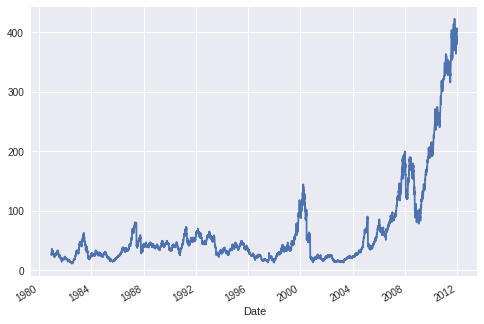

In [26]:
aapl['Close'].plot(grid = True)
plt.show()

In [30]:
#calculate the percentage change in price everyday
daily_percent_change = aapl[['Adj. Close']].pct_change()
daily_percent_change.fillna(0, inplace = True)
print(daily_percent_change)

            Adj. Close
Date                  
1980-12-12    0.000000
1980-12-15   -0.052174
1980-12-16   -0.073394
1980-12-17    0.024554
1980-12-18    0.029378
1980-12-19    0.060834
1980-12-22    0.048850
1980-12-23    0.042187
1980-12-24    0.052461
1980-12-26    0.092308
1980-12-29    0.014085
1980-12-30   -0.024444
1980-12-31   -0.028189
1981-01-02    0.010841
1981-01-05   -0.021739
1981-01-06   -0.044444
1981-01-07   -0.042481
1981-01-08   -0.020402
1981-01-09    0.053884
1981-01-12   -0.008156
1981-01-13   -0.035421
1981-01-14    0.004262
1981-01-15    0.020242
1981-01-16   -0.008000
1981-01-19    0.060323
1981-01-20   -0.030119
1981-01-21    0.019448
1981-01-22    0.011385
1981-01-23   -0.003651
1981-01-26   -0.015267
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

In [31]:
# Daily log returns
daily_log_returns = np.log(aapl[['Adj. Close']].pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
1980-12-12         NaN
1980-12-15   -0.053584
1980-12-16   -0.076227
1980-12-17    0.024258
1980-12-18    0.028954
1980-12-19    0.059055
1980-12-22    0.047694
1980-12-23    0.041321
1980-12-24    0.051131
1980-12-26    0.088293
1980-12-29    0.013986
1980-12-30   -0.024748
1980-12-31   -0.028594
1981-01-02    0.010783
1981-01-05   -0.021979
1981-01-06   -0.045462
1981-01-07   -0.043409
1981-01-08   -0.020613
1981-01-09    0.052483
1981-01-12   -0.008189
1981-01-13   -0.036063
1981-01-14    0.004253
1981-01-15    0.020039
1981-01-16   -0.008032
1981-01-19    0.058573
1981-01-20   -0.030582
1981-01-21    0.019261
1981-01-22    0.011320
1981-01-23   -0.003657
1981-01-26   -0.015385
...                ...
2011-11-17   -0.019314
2011-11-18   -0.006566
2011-11-21   -0.015942
2011-11-22    0.020121
2011-11-23   -0.025610
2011-11-25   -0.009363
2011-11-28    0.033936
2011-11-29   -0.007794
2011-11-30    0.023830
2011-12-01    0.014881
2011-12-02 

In [32]:
# Resample to business months, take last observation as value 
monthly = aapl[['Adj. Close']].resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,Adj. Close
Date,
1980-12-31,NaN
1981-01-30,-0.172282
1981-02-27,-0.061947
1981-03-31,-0.075472
1981-04-30,0.158367
1981-05-29,0.167371
1981-06-30,-0.215213
1981-07-31,-0.038462
1981-08-31,-0.194800


In [33]:
# Resample to quarters, take the mean as value per quarter
quarter = aapl[['Adj. Close']].resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Adj. Close
Date,
1980-12-31,NaN
1981-04-30,-0.095816
1981-08-31,-0.032958
1981-12-31,-0.290310
1982-04-30,-0.056020
1982-08-31,-0.223556
1982-12-31,0.857417
1983-04-30,0.625962
1983-08-31,0.116060


In [0]:
daily_pct_Change = aapl[['Adj. Close']]/(aapl[['Adj. Close']].shift(1) - 1)

In [38]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [40]:
display(daily_pct_Change)
display(daily_percent_change)

,Adj. Close
Date,
1980-12-12,NaN
1980-12-15,-0.694017
1980-12-16,-0.619416
1980-12-17,-0.604945
1980-12-18,-0.631878
1980-12-19,-0.682628
1980-12-22,-0.745143
1980-12-23,-0.804498
1980-12-24,-0.875204


,Adj. Close
Date,
1980-12-12,0.000000
1980-12-15,-0.052174
1980-12-16,-0.073394
1980-12-17,0.024554
1980-12-18,0.029378
1980-12-19,0.060834
1980-12-22,0.048850
1980-12-23,0.042187
1980-12-24,0.052461


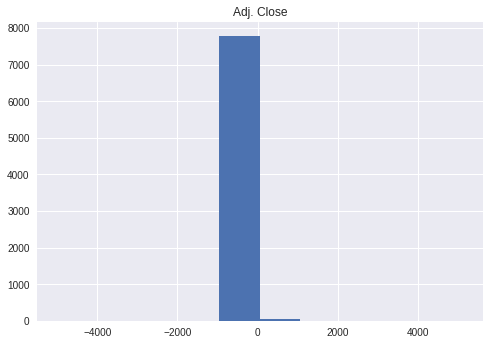

In [45]:
#plot the distribution of daily_percent_change
daily_pct_Change.hist(bins = 10)
plt.show()

In [46]:
#calculate the cumulative daily returns
cum_daily_return = (1+daily_pct_Change).cumprod()
print(cum_daily_return)

              Adj. Close
Date                    
1980-12-12           NaN
1980-12-15  3.059834e-01
1980-12-16  1.164523e-01
1980-12-17  4.600502e-02
1980-12-18  1.693544e-02
1980-12-19  5.374838e-03
1980-12-22  1.369816e-03
1980-12-23  2.678019e-04
1980-12-24  3.342054e-05
1980-12-26  1.335240e-08
1980-12-29 -1.431497e-09
1980-12-30  1.388746e-10
1980-12-31 -5.217420e-12
1981-01-02  9.482137e-14
1981-01-05 -6.671781e-16
1981-01-06 -3.921945e-17
1981-01-07 -5.356062e-18
1981-01-08 -9.929433e-19
1981-01-09 -1.547145e-19
1981-01-12 -1.932824e-20
1981-01-13 -3.130288e-21
1981-01-14 -5.744358e-22
1981-01-15 -9.425637e-23
1981-01-16 -1.477828e-23
1981-01-19 -1.654608e-24
1981-01-20 -1.536799e-25
1981-01-21 -1.545632e-26
1981-01-22 -1.150792e-27
1981-01-23 -7.839739e-29
1981-01-26 -6.700978e-30
...                  ...
2011-11-17  0.000000e+00
2011-11-18  0.000000e+00
2011-11-21  0.000000e+00
2011-11-22  0.000000e+00
2011-11-23  0.000000e+00
2011-11-25  0.000000e+00
2011-11-28  0.000000e+00


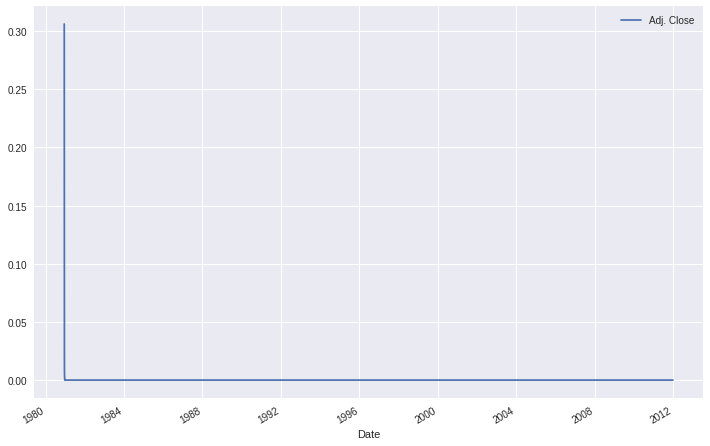

In [48]:
cum_daily_return.plot(figsize=(12,8))
plt.show()